# Escribiendo contenidos en formato `jupyter notebook`

Jupyter es un proyecto de código abierto cuyo objetivo es facilitar la interacción con datos y/o cómputo de índole científico

Una de las herramientas que provee este proyecto es el cuadernillo/notebook jupyter 

Un cuadernillo jupyter es un archivo con extensión `.ipynb` que combina bloques o celdas de texto formateado en markdown y de código ejecutable (python, julia, r, c, etc)

Si escribes en tu terminal

     jupyter notebook
     
Lanzarás un servidor de jupyter con el que puedes crear y editar cuadernillos. 

Esta página fue creada a partir de un cuadernillo jupyter usando jupyter book

Para mayor detalles sobre como se usan los cuadernillos jupyter puedes revisar [este material](https://magister-informatica-uach.github.io/INFO147/clases/unidad1/04_jupyter_y_ipython.html). A continuación se darán algunos ejemplos básicos

## Bloques de código

Un bloque de código en un cuadernillo se ejecuta y su salida se muestra en el libro interactivo por ejemplo

In [5]:
def Fibonacci(n):
    if n == 0:
        return 0
    elif n == 1 or n == 2:
        return 1
    else:
        return Fibonacci(n-1) + Fibonacci(n-2)

for i in range(10):
    print(i, Fibonacci(i))

0 0
1 1
2 1
3 2
4 3
5 5
6 8
7 13
8 21
9 34


## IPython display

El módulo IPython display permite mostrar algunos contenidos de media de forma muy simple 

Por ejemplo para mostrar un reproductor de video para Youtube

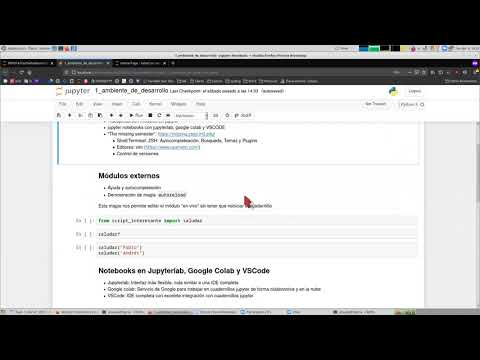

In [7]:
from IPython.display import YouTubeVideo

# El video original es https://www.youtube.com/watch?v=F7vtuAbWYN4
# usamos sólo la id como argumento
YouTubeVideo("F7vtuAbWYN4")

O por un reproductor de audio con

In [8]:
from IPython.display import Audio
Audio(url="http://www.w3schools.com/html/horse.ogg")